In [1]:
# Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Load CSV file
df = pd.read_csv("E:/CodeAlphaInternship/Unemployment in India.csv")

# Display the first 5 lines
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
#  General information
print("Informations sur le dataset :")
df.info()

# Dataset dimensions
print("\nDimensions :", df.shape)

# Descriptive statistics
print("\nStatistiques descriptives :")
print(df.describe(include='all'))

# Check for missing values
print("\nValeurs manquantes :")
print(df.isnull().sum())

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

Dimensions : (768, 7)

Statistiques descriptives :
                Region         Date  Frequency  \
count              740          740        740   
unique              28

In [12]:
# Rename columns for clarity if necessary
df.columns = df.columns.str.strip() # Remove spaces from column names

# Check for duplicates
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

# Drop or fill in missing values ​​(as appropriate)
df = df.dropna()

Duplicates: 0


In [13]:
# List of unique regions
print("Regions covered:", df['Region'].unique())

# Period covered
print("Available dates:")
print(df['Date'].min(), " → ", df['Date'].max())

# Average overall unemployment rate
print("Average unemployment rate:", df['Estimated Unemployment Rate (%)'].mean())

Regions covered: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
Available dates:
2019-05-31 00:00:00  →  2020-06-30 00:00:00
Average unemployment rate: 11.787945945945946


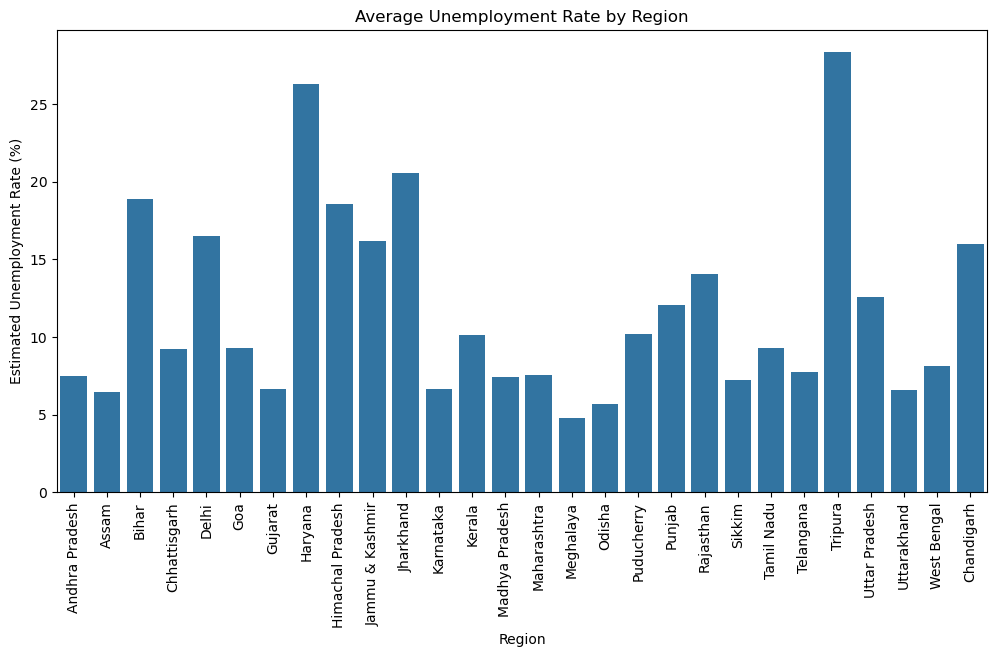

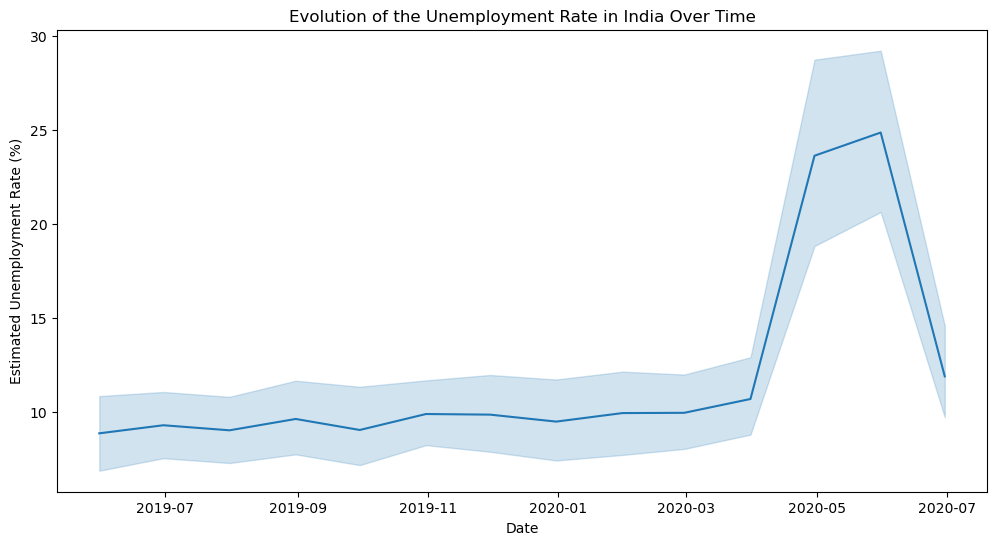

In [14]:
# Visualizing the unemployment rate by region
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y='Estimated Unemployment Rate (%)', errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()

# Unemployment Rate Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Evolution of the Unemployment Rate in India Over Time")
plt.show()

Period
Before Covid     9.509534
During Covid    17.774363
Name: Estimated Unemployment Rate (%), dtype: float64


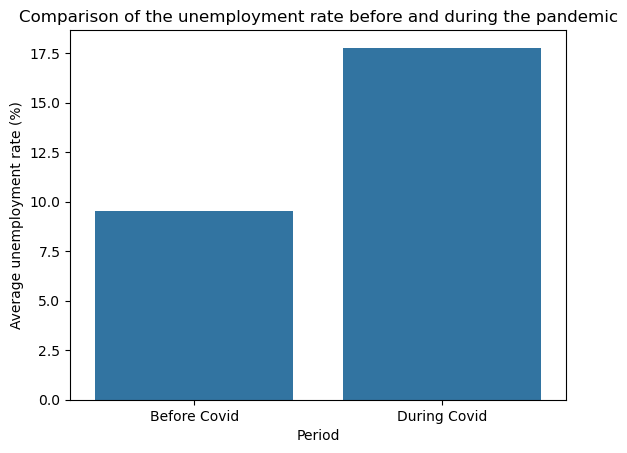

In [16]:
# Convert the Date column to the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a "Before" and "During" Covid period
df['Period'] = np.where(df['Date'] < '2020-03-01', 'Before Covid', 'During Covid')

# Compare the averages
covid_comparison = df.groupby('Period')['Estimated Unemployment Rate (%)'].mean()
print(covid_comparison)

# Visualize
sns.barplot(x=covid_comparison.index, y=covid_comparison.values)
plt.title("Comparison of the unemployment rate before and during the pandemic")
plt.ylabel("Average unemployment rate (%)")
plt.show()

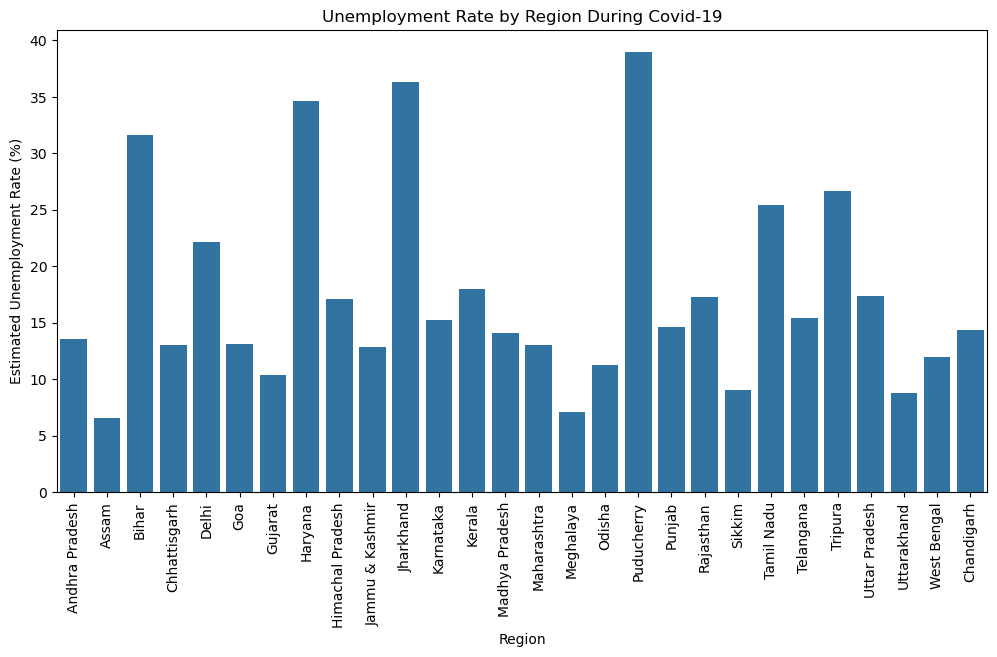

In [17]:
# Compare regional unemployment rates during Covid
covid_data = df[df['Period'] == 'During Covid']
plt.figure(figsize=(12,6))
sns.barplot(data=covid_data, x='Region', y='Estimated Unemployment Rate (%)', errorbar=None)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region During Covid-19")
plt.show()

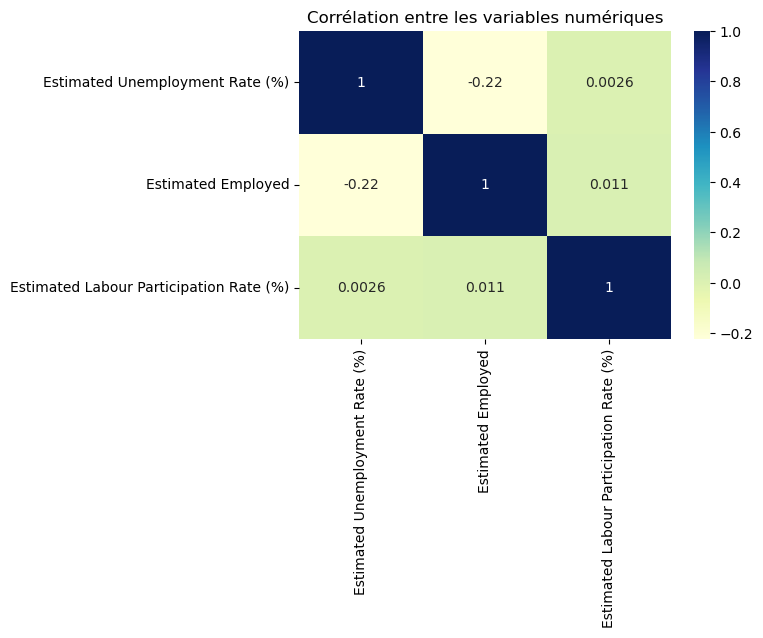

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Corrélation entre les variables numériques")
plt.show()

In [ ]:
### Summary and Conclusions
- The unemployment rate increased during the Covid-19 pandemic.

- Some regions (e.g., Tamil Nadu, Delhi) experienced higher peaks.

- The national average unemployment rate is approximately X%.

- Seasonal variations can be observed depending on the month.

In [11]:
df.to_csv("Unemployment_Cleaned.csv", index=False)